# QF600 Assignment 6

###### Prepared By:
Gabriel Woon

# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Consumption Growth

In [2]:
# consumption growth (g = e^(0.02 + 0.02ϵ))
simulation = 100000
consumption_growth = np.zeros(simulation)
for i in range(simulation):
    epsilon = np.random.standard_normal()
    consumption_growth[i] = np.exp(0.02 + 0.02*epsilon)

# Parameter

In [3]:
# subjective discount factor
delta = 0.99

# risk-free rate
rf = 1.0303

#b0
b0 = np.arange(0, 10.1, 0.1); b0

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

# Error Term

In [4]:
# error term
def e(b0,x):
    vlist=np.mean([nuhat(x*i) for i in consumption_growth])
    return delta*b0*vlist+delta*x-1

# Utility Function

In [5]:
# utility from financial gain/loss
def nuhat(R):
    if R>rf:
        return R-rf
    if R<rf:
        return 2*(R-rf)

# Bisection Search

In [6]:
# x = 1 + dividend yield

# bisection search function 
def bisection(x_lower, x_upper, b0):
    x=(x_lower+x_upper)/2
    if (abs(e(b0,x))<10**(-5)):
        return x
    elif e(b0,x)<0:
        x_lower=x
        return bisection(x_lower,x_upper,b0)
    elif e(b0,x)>0:
        x_upper=x
        return bisection(x_lower,x_upper,b0)

# x parameter
x_lower=1
x_upper=1.1

# compute x 
xlist=[bisection(x_lower,x_upper,b0) for b0 in b0]

## Plot Price Dividend Ratio-b0 Line

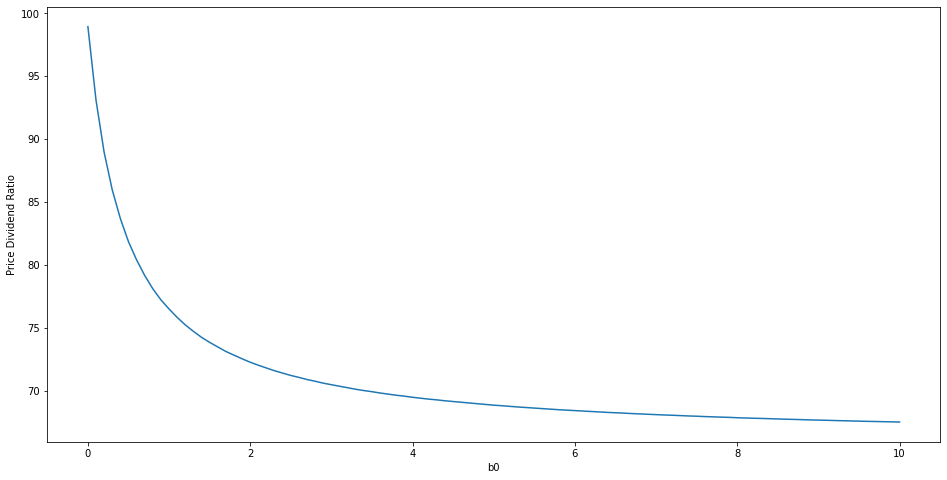

In [7]:
# compute price dividend ratio
price_dividend_ratio = 1/(np.array(xlist)-1)

# plot price-dividend ratio
plt.figure(figsize=(16,8))
plt.plot(b0, price_dividend_ratio)  

plt.xlabel('b0')
plt.ylabel('Price Dividend Ratio')
plt.show()

## Plot Equity Premium-b0 Line

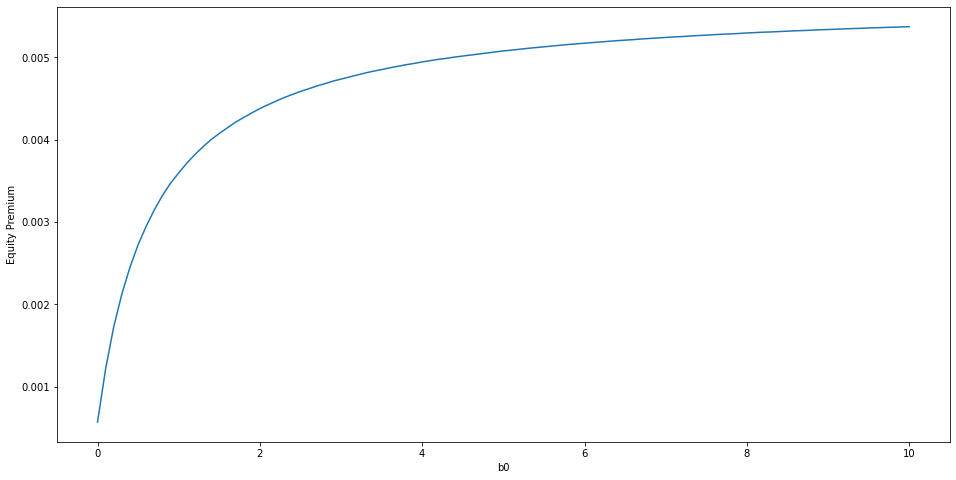

In [8]:
# compute expected market return 
market_return = np.array([np.mean([m*n for n in consumption_growth]) for m in xlist])

# compute equity premium
equity_premium = market_return - rf

#plot equity premium
plt.figure(figsize=(16,8))
plt.plot(b0, equity_premium) 

plt.xlabel('b0')
plt.ylabel('Equity Premium')
plt.show()